# 0304 課程加分題
電機系大三 E24084096 林珮玉
### 作業說明：
將範例圖片 twins.jpg 右下四分之一陣列的灰階值畫成長條圖

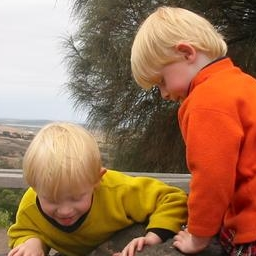

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'numpy.ndarray'>
uint8


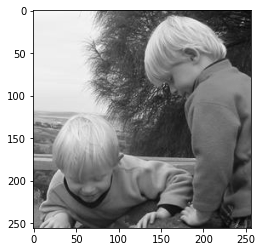

(256, 256)


In [35]:
import numpy as np
import cv2
## 使用 OpenCV 讀取灰階圖檔 讀取的圖片可至moodle下載
img = cv2.imread('/twins.jpg',cv2.IMREAD_GRAYSCALE)

#檢查資料型態
print(type(img))
print(img.dtype)

import matplotlib.pyplot as plt
# 使用 Matplotlib 顯示圖片
plt.imshow(img, cmap='gray')
plt.show()

#檢查資料的numpy陣列大小
print(img.shape)

In [43]:
from google.colab.patches import cv2_imshow

In [131]:
# 裁減右下1/4圖片
def crop_img(img):

    # left, right
    x_l, x_r = 128, 256 

    # up, down
    y_u, y_d = 128, 256 

    # crop image
    crop_img = img[y_u:y_d, x_l:x_r]  # notice: first y, then x

    return crop_img

In [132]:
crop_img(img)
crop_img(img).shape

(128, 128)

In [133]:
#扁平化資料
com_crop_img=np.ravel(crop_img(img))

In [134]:
# 計算 1/4 圖片中不同的灰階各個出現幾次
(unique, counts) = np.unique(com_crop_img, return_counts=True)
count = np.asarray((unique, counts))
print(count)

[[  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
   21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
   39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
   57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
   75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
   93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
  111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
  129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
  147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
  165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
  183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
  201 202 203 204 205 206 207 208 209 210 211 212 215 217]
 [  1   1   1   2   5   3   8   8   9  13  22  19  21  26  31  34  35  39
   49  48  62  66  56  62  79  78  62  98  99  88 108

<BarContainer object of 212 artists>

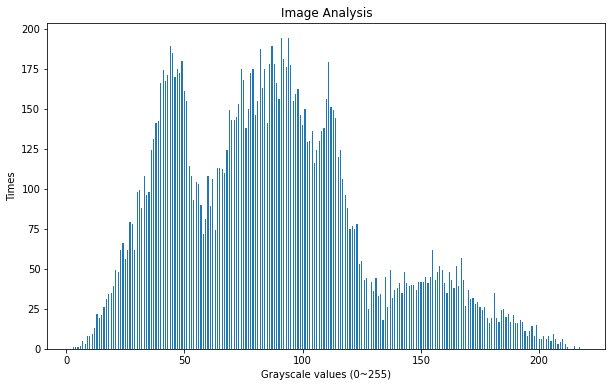

In [140]:
# 作圖
plt.figure(figsize=(10,6))
plt.title('Image Analysis')
plt.ylabel('Times')
plt.xlabel('Grayscale values (0~255)')
plt.bar(count[0],count[1],0.5)